#Exercises: Statistical Moments and Normality Testing - Answer Key

## Lecture Link : 
https://www.quantopian.com/lectures/statistical-moments

###IMPORTANT NOTE: 
This lecture corresponds to the Statistical Moments and Normality Testing lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

In [1]:
# Useful Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera

---

#Exercise 1: Testing for Skew

##a. Artificial Example

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named X. 

Skew: 0.264748310964
The distribution is positively skewed


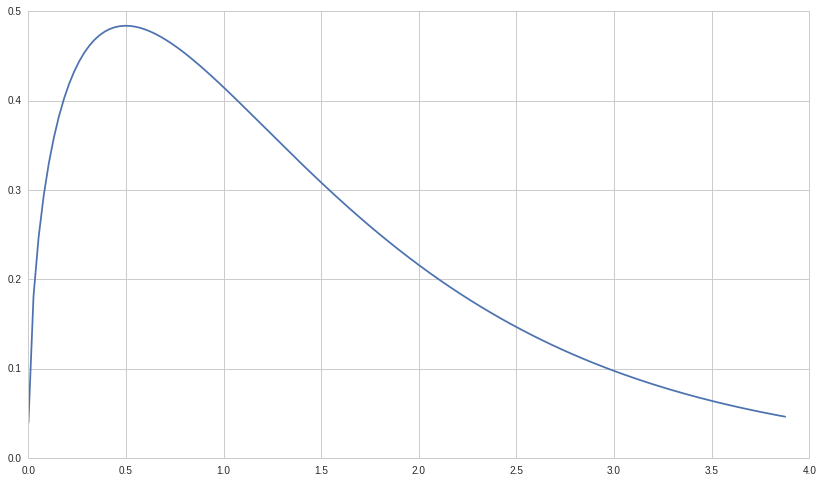

In [2]:
xs2 = np.linspace(stats.gamma.ppf(0.01, 0.7, loc=-1), stats.gamma.ppf(0.99, 0.7, loc=-1), 150) + 1

X = stats.gamma.pdf(xs2, 1.5)

#Your code goes here

skew = stats.skew(X)

plt.plot(xs2, X)

print 'Skew:', skew
if skew > 0:
    print 'The distribution is positively skewed'
elif skew < 0:
    print 'The distribution is negatively skewed'
else:
    print 'The distribution is symmetric'

##b. Real Example

Use the results from the `stats.skew` function to determine the skew of the returns of NFLX and use it to make a conclusion about the symmetry of the stock's returns. 

Skew: 1.84134227597
The returns of NFLX have a strong positive skew, meaning their volatility is characterized by frequent small changes in price with interspersed large upticks.


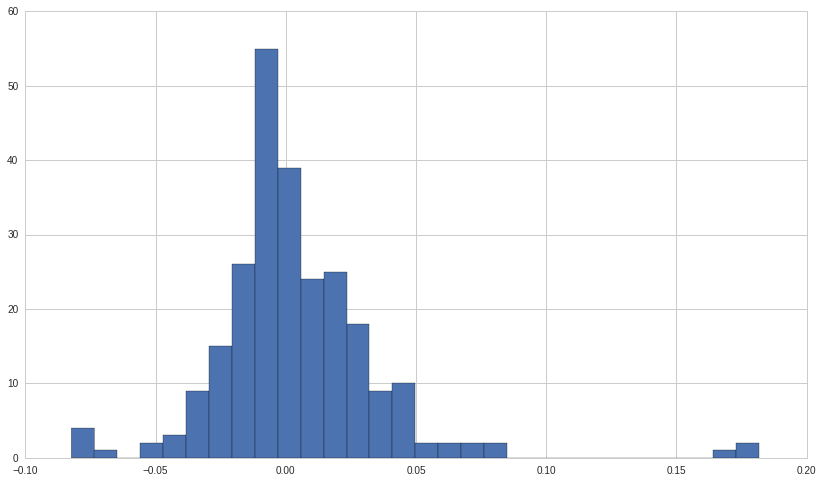

In [3]:
start = '2015-01-01'
end = '2016-01-01'
pricing = get_pricing('NFLX', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

skew = stats.skew(returns)

plt.hist(returns, 30)

print 'Skew:', skew
print 'The returns of NFLX have a strong positive skew, meaning their volatility is characterized by frequent small changes in price with interspersed large upticks.'


---

#Exercise 2: Testing for Kurtosis

##a. Artificial Example

Use the results from the `stats.kurtosis` function to determine the excess kurtosis of the artificial distribution named Y. 

Excess kurtosis of Y: -0.634472016416
Because the excess kurtosis is negative, Y is platykurtic. Platykurtic distributions cluster around the mean, so large values in either direction are less likely


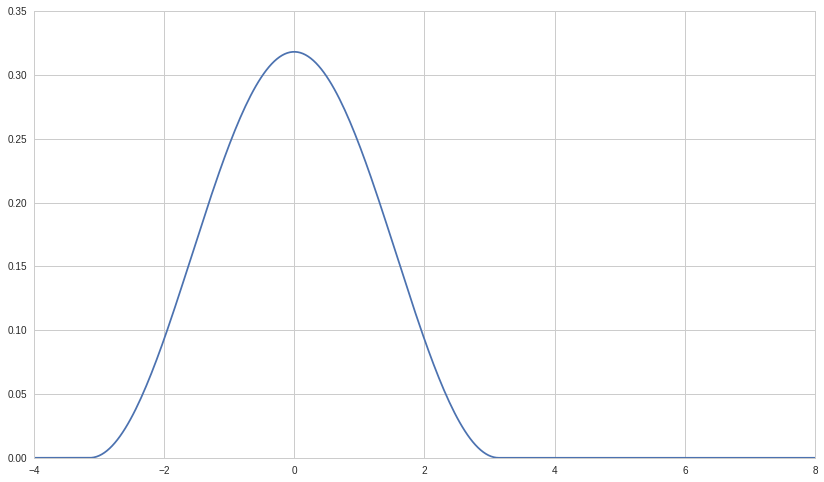

In [4]:
xs = np.linspace(-6,6, 300) + 2 

Y = stats.cosine.pdf(xs)

#Your code goes here

plt.plot(xs, Y)

print 'Excess kurtosis of Y:', (stats.kurtosis(Y))
print 'Because the excess kurtosis is negative, Y is platykurtic. Platykurtic distributions cluster around the mean, so large values in either direction are less likely'

##b. Real Example

Use the results from the `stats.kurtosis` function to determine the kurtosis of the returns of NFLX and use it to make a conclusion about the volatility of the stock's price.

Kurtosis: 9.52008087913
The historical returns of NFLX are strongly leptokurtic. Because of a leptokurtic distribution`s fatter tails, small changes in prices happen less often and large changes are more common. This makes the stock a riskier investment.


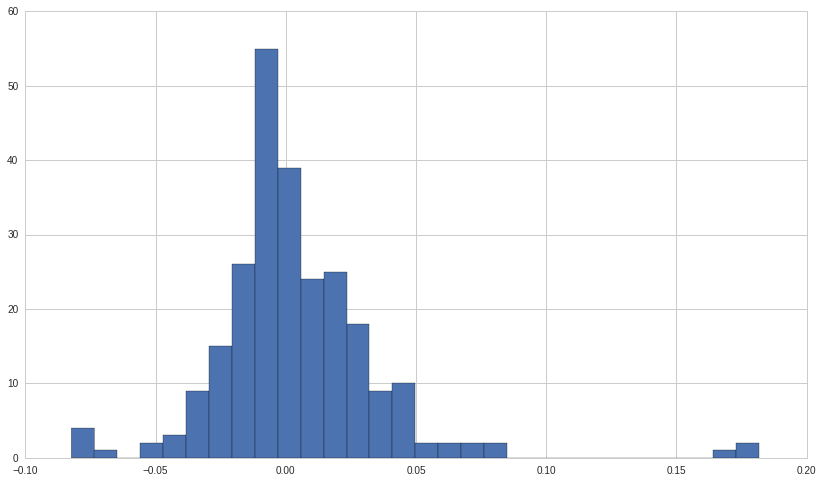

In [5]:
start = '2015-01-01'
end = '2016-01-01'
pricing = get_pricing('NFLX', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

kurt = stats.kurtosis(returns)

plt.hist(returns, 30)

print 'Kurtosis:', kurt
print 'The historical returns of NFLX are strongly leptokurtic. Because of a leptokurtic distribution`s fatter tails, small changes in prices happen less often and large changes are more common. This makes the stock a riskier investment.'

---

# Exercise 3: Skew and Normality

##a. Artificial Example II

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named Z. 

In [6]:
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

#Your code goes here

skew = stats.skew(Z)

print 'Skew:', skew
if skew > 0:
    print 'The distribution is positively skewed'
elif skew < 0:
    print 'The distribution is negatively skewed'
else:
    print 'The distribution is symmetric'

Skew: 1.1121491036
The distribution is positively skewed


## b. Jarque-Bera Calibration

Ensure that the `jarque-bera` function is calibrated by running it on many trials of simulated data and ensuring that the sample probability that the test returns a result under the p-value is equal to the p-value.

In [7]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

num_significant = len(pvalues[pvalues < 0.05])

#Your code goes here

print float(num_significant) / N
print 'Our answer is around 5%, which is what we would expect for a cutoff of 5% and a correctly-calibrated Jarque-Bera test.'

0.048
Our answer is around 5%, which is what we would expect for a cutoff of 5% and a correctly-calibrated Jarque-Bera test.


## c. Jarque-Bera Test

Use the `Jarque-Bera` function to determine the normality of Z.

In [8]:
#Your code goes here

_, pvalue, _, _ = jarque_bera(Z)

print pvalue
if pvalue > 0.05:
    print 'The returns are likely normal.'
else:
    print 'The returns are likely not normal.'

1.67689917417e-07
The returns are likely not normal.


## d. Skewness and Normality

Plot Z and observe that skewness is not informative unless the underlying distribution is somewhat normal.

The positive skew found in part a would have led us to believe values are concentrated below the mean and a tail extends to the right, however this is not the case. Because Z is bimodal, we can make no conclusions based on the skewness value alone. In order for skewness to be useful, the underlying distribution must be somewhat normal


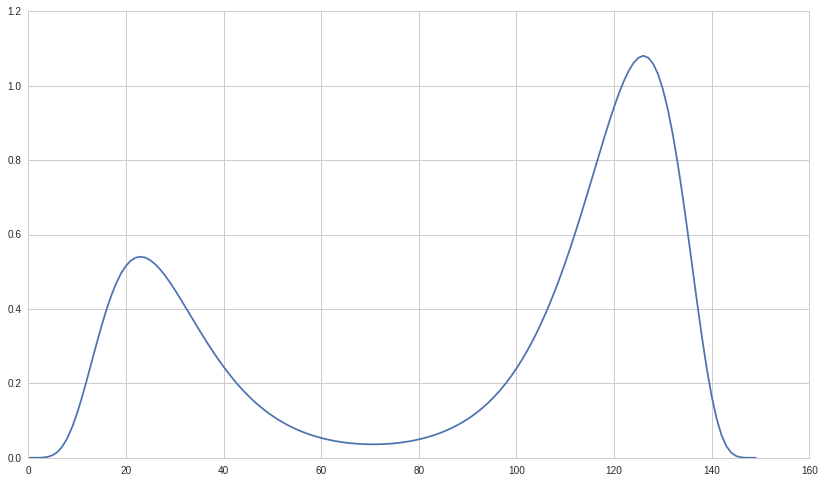

In [9]:
#Your code goes here

plt.plot(Z)

print 'The positive skew found in part a would have led us to believe values are concentrated below the mean and a tail extends to the right, however this is not the case. Because Z is bimodal, we can make no conclusions based on the skewness value alone. In order for skewness to be useful, the underlying distribution must be somewhat normal'


---

# Exercise 4: Out of Sample Test

##a. Testing for Normality

Plot a histogram of the historical returns of AMC to ensure it is unimodal and vaguely normal before testing it for skewness in part b.

The returns of AMC from 2014 through 2016 are unimodal and vaguely normal, so a skewness measure would be relevant.


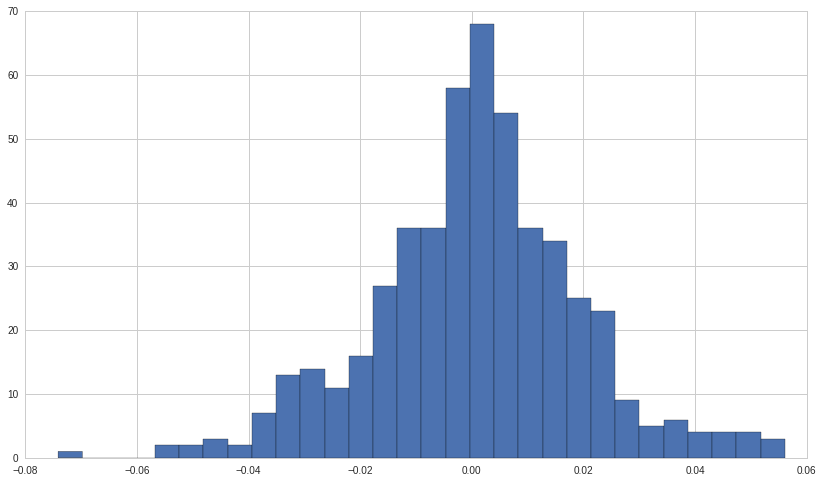

In [10]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

print 'The returns of AMC from 2014 through 2016 are unimodal and vaguely normal, so a skewness measure would be relevant.'

plt.hist(returns, 30);

##b. Test for Skew

Find the skew of the historical returns of AMC between 2014 to 2016. 

In [11]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

print 'Skew of AMC:', stats.skew(returns)

Skew of AMC: -0.128642043604


## c. Out of Sample Test

Find the skew of the historical retunrs of AMC from the first half of 2016 to determine if the skew from part b holds outside of the original sample.

In [12]:
start = '2016-01-01'
end = '2016-07-01'
out_pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
out_returns = out_pricing.pct_change()[1:]

#Your code goes here

print 'Skew of AMC:', stats.skew(out_returns)
print 'The negative skew of AMC between 2014 and 2016 did not hold outside of the orignal sample, meaning the skew of AMC might be volatile and not reliable enough for predictions about future behavior.'

Skew of AMC: 0.971754222772
The negative skew of AMC between 2014 and 2016 did not hold outside of the orignal sample, meaning the skew of AMC might be volatile and not reliable enough for predictions about future behavior.


## d. Rolling Skew

Plot the rolling skew of AMC using the `pd.rolling_skew` function. 

This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample.


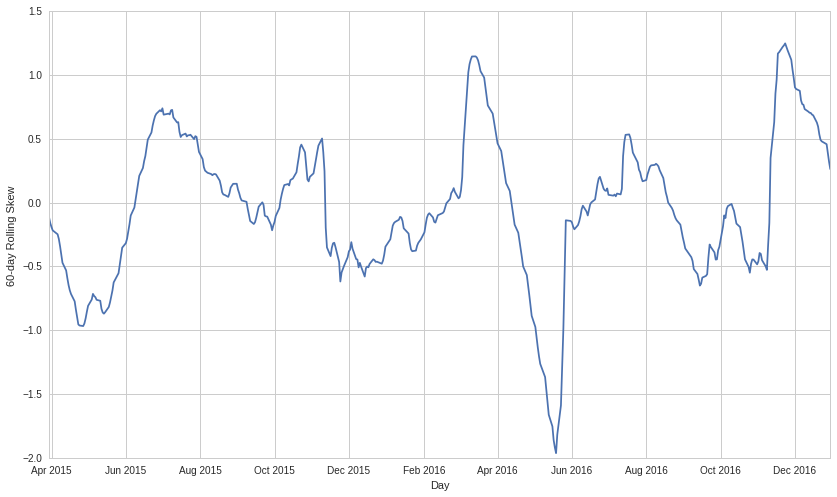

In [17]:
AMC = get_pricing('AMC', fields='price', start_date='2015-01-01', end_date='2017-01-01')

#Your code goes here
rolling_skew = AMC.rolling(window=60,center=False).skew()
plt.plot(rolling_skew)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Skew')
print "This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample."

---

Congratulations on completing the Statistical Moments and Normality Testing exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*